In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import create_sliding_window, restore_labels

In [ ]:
#ЭКСГАУСТЕР №4

In [3]:
X_columns = [
       'ЭКСГАУСТЕР 4. ТОК РОТОРА 1', 'ЭКСГАУСТЕР 4. ТОК РОТОРА2',
       'ЭКСГАУСТЕР 4. ТОК СТАТОРА', 'ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.']

In [4]:
y_columns = [
    'Y_ЭКСГАУСТЕР А/М №4_ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_УЛИТА ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_РЕДУКТОР ГАЗ. ЗАДВИЖКИ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_МАСЛОНАСОС РАБОЧИЙ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЭЛЕКТРОАППАРАТУРА ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ №2 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЗАДВИЖКА ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ГСМ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ВК 310С ВИБРОПРЕОБРАЗОВАТЕЛЬ ЭКСГ.№4 Т.1',
    'Y_ЭКСГАУСТЕР А/М №4_ТСМТ-101-010-50М-400 ТЕРМОПР.ПОДШ.Т.1',
    'Y_ЭКСГАУСТЕР А/М №4_РОТОР ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_МАСЛООХЛАДИТЕЛЬ  М-05-1 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНО-УПОРНЫЙ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЭКСГАУСТЕР А/М №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЗАП. И РЕГ. АРМАТУРА ЭКСГ.№4',
    'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ №1 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЭЛ/ДВИГАТЕЛЬ ГАЗ. ЗАДВИЖКИ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_КЛ1 ТР№4 ДО ЭД ЭКСГАУСТЕРА №4',
    'Y_ЭКСГАУСТЕР А/М №4_КЛ2 ТР№4 ДО ЭД ЭКСГАУСТЕРА №4',
    'Y_ЭКСГАУСТЕР А/М №4_ТР-Р ТМ-4000-10/6 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ТИРИСТ. ВОЗБУДИТЕЛЬ ВТ-РЭМ-400 ЭКСГ4 ВУ1',
    'Y_ЭКСГАУСТЕР А/М №4_МАСЛОПРОВОДЫ ЭКСГ №4'
]

In [36]:
df = pd.read_parquet('../data/X_train.parquet', columns=X_columns)
y = pd.read_parquet('../data/y_train.parquet', columns=y_columns)
messages = pd.read_excel('../data/messages.xlsx')

In [ ]:
df.isna().sum() / df.shape[0]

In [11]:
dfi = df.interpolate()

In [13]:
y = y['Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4']

y.value_counts()

Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4
2.0    6725776
0.0    2609258
Name: count, dtype: int64

In [31]:
y.isna().sum()

0

In [23]:
print(messages.shape)

(981, 10)


In [38]:
messages['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ'].isna().sum()

130

In [39]:
# Округление дат

messages['ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ'] = messages['ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ'].apply(lambda t: t.ceil('10S'))

messages['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ'] = messages['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ'].apply(
    lambda t: t.floor('10S') if not pd.isnull(t) else np.nan  # чтобы не округлять NaT
)
messages.head()

,Unnamed: 0,МАШИНА,ИМЯ_МАШИНЫ,ТЕХ_МЕСТО,НАЗВАНИЕ_ТЕХ_МЕСТА,ВИД_СООБЩЕНИЯ,ОПИСАНИЕ,ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ,ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ,ТЕКСТ_ГРУППЫ_КОДОВ
0,390,AA2/006-006,ЭКСГАУСТЕР А/М №9,AA2/006-006-002-008,ЗАПОРНАЯ АРМАТУРА ЭКСГАУСТЕРА №9,M3,неисправен двигатель,2019-01-21 00:00:00,2019-02-25 00:00:00,NaN
1,391,CH-AGP-AG2/011-005,ЭКСГАУСТЕР А/М №9,CH-AGP-AG2/011-005-002,МАСЛОСТАНЦИЯ ЖИДКОЙ СМАЗКИ ЭКСГ. №9,M3,неисправен двигатель,2019-01-21 12:26:10,2019-02-25 00:00:00,NaN
2,392,AA2/002-006,ЭКСГАУСТЕР А/М №5,AA2/002-006-002-004,МАСЛООХЛАДИТЕЛЬ М-05-1 ЭКСГ. №5,M3,менять прокладку на подачу воды в охлади,2019-01-21 15:35:30,2019-01-23 11:00:00,NaN
3,393,CH-AGP-AG2/003-005,ЭКСГАУСТЕР А/М №5,CH-AGP-AG2/003-005-002-004,МАСЛООХЛАДИТЕЛЬ М-05-1 ЭКСГ. №5,M3,менять прокладку на подачу воды в охлади,2019-01-21 16:33:00,2019-01-22 00:00:00,NaN
4,394,CH-AGP-AG2/003-005,ЭКСГАУСТЕР А/М №5,CH-AGP-AG2/003-005-002-004,МАСЛООХЛАДИТЕЛЬ М-05-1 ЭКСГ. №5,M3,менять прокладку на подачу воды в охлади,2019-01-21 16:36:10,2019-06-04 15:35:20,NaN


In [41]:
messages['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ'].isna().sum()

130

In [9]:
# Найдем плановые ремонты

planned_repair_1 = messages[messages.iloc[:, 9] == 'ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ'].copy()
planned_repair_2 = messages[messages.iloc[:, 9] == 'ТЕХНОЛОГИЧЕСКИЕ ПЛАНОВЫЕ'].copy()
planned_repair = pd.concat([planned_repair_1, planned_repair_2], axis=0)

print(planned_repair.shape)
planned_repair

(9, 10)


,Unnamed: 0,МАШИНА,ИМЯ_МАШИНЫ,ТЕХ_МЕСТО,НАЗВАНИЕ_ТЕХ_МЕСТА,ВИД_СООБЩЕНИЯ,ОПИСАНИЕ,ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ,ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ,ТЕКСТ_ГРУППЫ_КОДОВ
58,969,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,M1,ТО,2020-04-10 09:05:10,2020-04-10 09:05:10,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
97,1341,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-003-002,РЕДУКТОР ГАЗ. ЗАДВИЖКИ ЭКСГ. №4,M1,ТО(замена редуктора газовой задвижки №4),2020-10-26 14:07:40,2020-10-26 14:07:40,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
197,518,CH-AGP-AG2/003-005,ЭКСГАУСТЕР А/М №5,CH-AGP-AG2/003-005-001-005-003,ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №5,M1,ТО (замена щеток на эл/двиг. эксг-ра),2019-04-23 15:34:30,2019-04-23 15:34:30,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
327,1763,AA2/002-006,ЭКСГАУСТЕР А/М №5,AA2/002-006,ЭКСГАУСТЕР А/М №5,M1,ТО(согласованное),2021-05-25 22:09:20,2021-05-25 22:09:20,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
328,1765,CH-AGP-AG2/003-005,ЭКСГАУСТЕР А/М №5,CH-AGP-AG2/003-005-003,ГАЗОВАЯ ЗАДВИЖКА ЭКСГАУСТЕРА А/М №5,M1,ТО согласованное,2021-05-26 15:42:40,2021-05-26 15:42:40,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
473,1670,AA2/003-006,ЭКСГАУСТЕР А/М №6,AA2/003-006,ЭКСГАУСТЕР А/М №6,M1,Согласованное ТО,2021-04-17 06:07:00,2021-04-17 06:07:00,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
650,1418,CH-AGP-AG2/007-005,ЭКСГАУСТЕР А/М №7,CH-AGP-AG2/007-005,ЭКСГАУСТЕР А/М №7,M1,ТО согласованное,2020-12-24 09:44:40,2020-12-24 09:44:40,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
664,1484,AA2/004-006,ЭКСГАУСТЕР А/М №7,AA2/004-006,ЭКСГАУСТЕР А/М №7,M1,ТО,2021-01-27 08:17:50,2021-01-27 08:17:50,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
458,1389,CH-AGP-AG2/005-005,ЭКСГАУСТЕР А/М №6,CH-AGP-AG2/005-005-003,ГАЗОВАЯ ЗАДВИЖКА ЭКСГАУСТЕРА А/М №6,M1,выпуск аглопыли из газового коллектора,2020-12-02 17:10:20,2020-12-02 17:10:20,ТЕХНОЛОГИЧЕСКИЕ ПЛАНОВЫЕ


In [41]:
dfi.shape

(9335034, 16)

In [14]:
# Уберем плановые ремонты из X и y

lst = []

start_col = messages['ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ']
end_col = messages['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ']

for start, end in zip(start_col, end_col):
    indexes = dfi.loc[(dfi.index >= start) & (dfi.index <= end)].index
    lst.extend(indexes)

dfi = dfi.drop(lst)
y = y.drop(lst)

In [15]:
print(dfi.shape)
print(y.shape)

(9334053, 16)
(9334053,)


In [ ]:
# Проверить совпадение начала аварии и с авариями без сообщения о завершения

In [16]:
# Усовершенствовать и в утиль
# убрала any(axis=1)
#X_train поменяла на X

def plot_failure(interval, X):
    '''Функция рисует временной ряд на заданном или всём интервале
    Цветом выделяются поломки:
    зеленый - без аварии
    красный - авария без простоя M3
    синий - авария с простоем M1
    '''
    
    # Разделяем индексы по поломкам в y
    M0_indx = interval.loc[(interval == 0)].index   # без аварий
    M1_indx = interval.loc[(interval == 1)].index   # авария с простоем
    M3_indx = interval.loc[(interval == 2)].index   # авария без простоя
    
    # Разделяем Х по поломкам
    M0 = X.loc[M0_indx]
    print('M0', M0.shape)
    M1 = X.loc[M1_indx]
    print('M1', M1.shape)
    M3 = X.loc[M3_indx]
    print('M3', M3.shape)
    
    plt.figure(figsize=(11, 7))
    sns.lineplot(M0, color='green')
    sns.lineplot(M1, color='blue')
    sns.lineplot(M3, color='red')

M0 (2609000,)
M1 (0,)
M3 (6725053,)


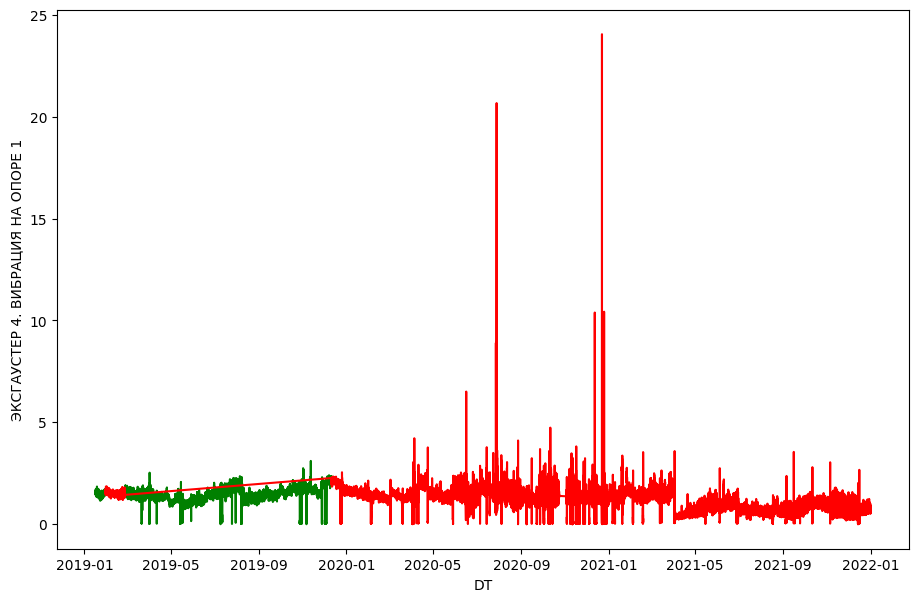

In [17]:
plot_failure(y, dfi['ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1'])

In [49]:
# Оставляем начальный интервал X и y до первого сообщения о поломке, не имеющей даты устранения

# Находим первое такое сообщение для нужного эксгаустера

endless_fail = messages[messages['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ'].isna()].copy()

y.name

'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4'

In [50]:
endless_fail = endless_fail[endless_fail['НАЗВАНИЕ_ТЕХ_МЕСТА'].apply(lambda x: x in y.name)]

print(endless_fail.shape)
endless_fail

(5, 10)


,Unnamed: 0,МАШИНА,ИМЯ_МАШИНЫ,ТЕХ_МЕСТО,НАЗВАНИЕ_ТЕХ_МЕСТА,ВИД_СООБЩЕНИЯ,ОПИСАНИЕ,ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ,ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ,ТЕКСТ_ГРУППЫ_КОДОВ
346,842,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,утечка масла,2020-01-16 14:27:30,NaT,NaN
360,865,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,течь масла,2020-01-28 17:01:40,NaT,NaN
370,882,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,течь масла,2020-02-09 08:58:30,NaT,NaN
398,934,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,утечка смазки на опорном под-ке №2,2020-03-20 22:20:20,NaT,NaN
838,1899,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,Утечка масла,2021-07-27 11:38:00,NaT,NaN


In [63]:
# Прибавляем 20 минут к первому сообщению

date = endless_fail['ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ'].iloc[0] + pd.Timedelta(minutes=20)
print(date)

X_train = dfi[:date]
y_train = y[:date]


2020-01-16 14:47:30


In [67]:
print(X_train.shape)
print(y_train.shape)

(3153773, 16)
(3153773,)


In [70]:
X_train.to_csv('../data/processed/ex4_X_all_for_y_2.csv', index=True)
y_train.to_csv('../data/processed/ex4_y_2.csv', index=True)